# Introduction

The Melbourne House Price dataset was taken from Kaggle and was posted by Tony Pino. The house data was scraped from the Domain website which is updated weekly.

# Data Exploration

Firstly, we'll load the data and have a look at the columns and try to make sense what those are

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from datetime import datetime
import time
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction import FeatureHasher

In [2]:
melb_df_full = pd.read_csv(r'C:\Users\john.osorio\Desktop\BLACK CAT\Capstone Project\House Price Predictor\melbourne-housing-market\Melbourne_housing_FULL.csv')

In [3]:
melb_df_full.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# TODO 1: Show the columns/features here

In [4]:
melb_df_full.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
melb_df_full.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


The total property count

In [6]:
melb_df_full.Rooms.count()

34857

Check for missing target values

In [7]:
melb_df_full.Price.isnull().sum()

7610

There are a sizable 7610 properties without price information. Let's just remove them and perhaps predict their price using our model later on?

In [8]:
# Let's create another dataframe of properties with null price values (and also null observations) and test them later

melb_df_no_price = melb_df_full[melb_df_full.Price.isnull()]

In [9]:
# Remove all rows with missing price information

melb_df_full = melb_df_full[melb_df_full.Price.notnull()]

And store it in another CSV file for later use

In [10]:
# melb_df_no_price.to_csv(r'C:\Users\john.osorio\Desktop\BLACK CAT\Capstone Project\House Price Predictor\melbourne-housing-market\melbourne_housing_no_price.csv')

# Do a pairplot of all the relevant features 

In [11]:
melb_df_full.shape

(27247, 21)

In [12]:
melb_df_full.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

Just remove rows in Landsize and Building Area that has null values

In [13]:
melb_df_plot = melb_df_full[melb_df_full.Landsize.notnull()]
melb_df_plot.shape

(17982, 21)

In [14]:
melb_df_plot = melb_df_plot[melb_df_plot.BuildingArea.notnull()]
melb_df_plot.shape

(9382, 21)

We now have 9,382 samples which is still sizable

In [15]:
melb_df_plot_ = melb_df_plot.loc[:, ['Price', 'Suburb', 'Rooms', 'Type', 'Distance', 'Landsize', 'BuildingArea']]

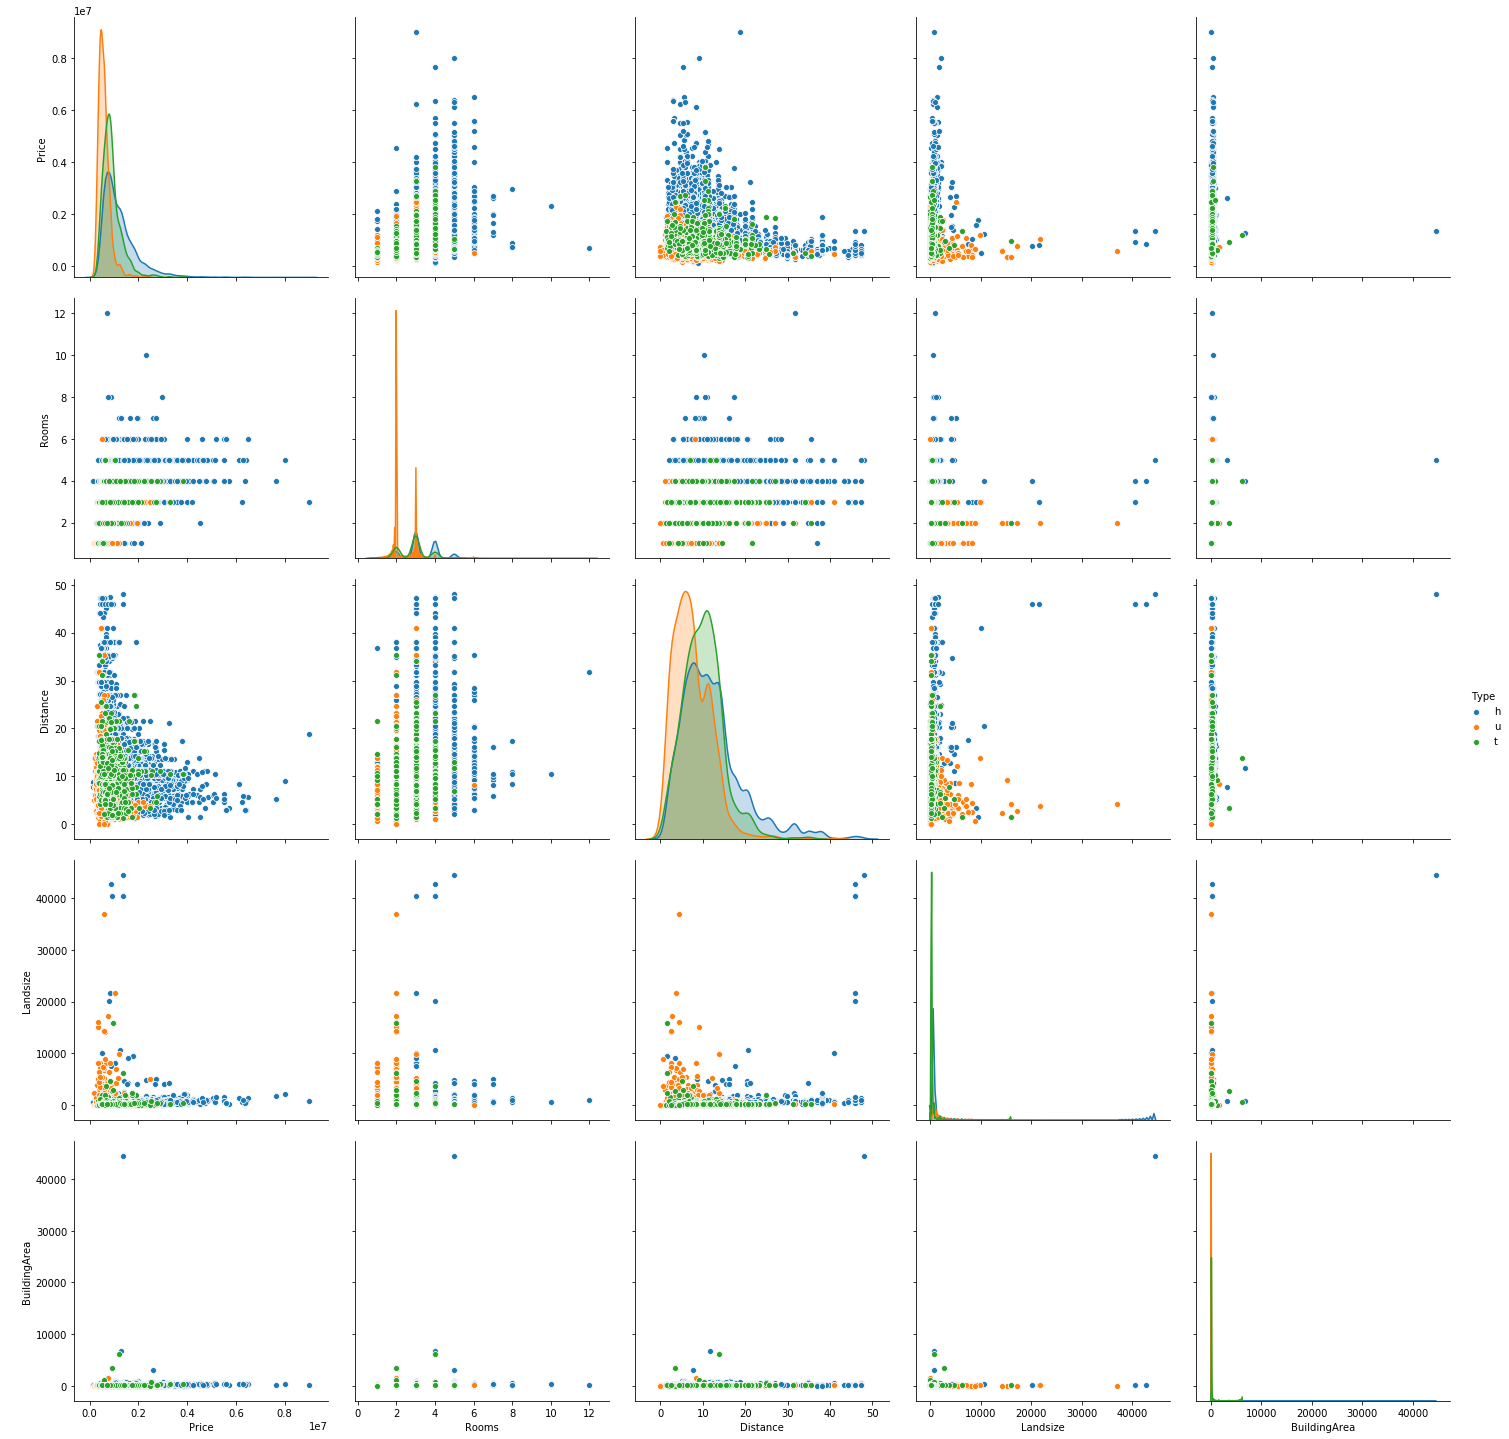

In [16]:
sns.pairplot(melb_df_plot_, hue = 'Type', height = 4)

# Apply Boxplot to more properly see the outliers

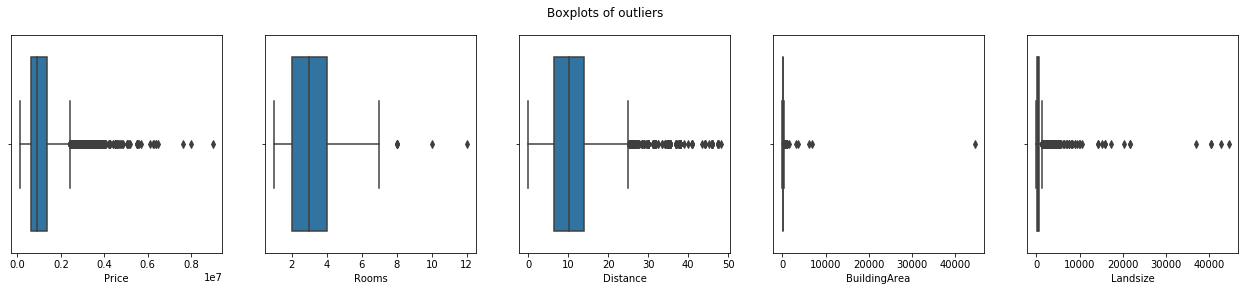

In [17]:
fig, axes = plt.subplots(1, 5, figsize=(22, 4))
fig.suptitle('Boxplots of outliers')

sns.boxplot(melb_df_plot.Price, ax=axes[0])
sns.boxplot(melb_df_plot.Rooms, ax=axes[1])
sns.boxplot(melb_df_plot.Distance, ax=axes[2])
sns.boxplot(melb_df_plot.BuildingArea, ax=axes[3])
sns.boxplot(melb_df_plot.Landsize, ax=axes[4])


# Looks like we have outliers, let's apply Z-score to determine them

In [18]:
# Create a helper function to return a list of all outliers in the data

def Z_detect_outliers(data):
    
    '''
    parameters: 
    1. data - iterative type e.g. Pandas Series or a common List
    
    returns: a List of all outliers
    
    note: do a min() on the list to identify starting point before it become outliers
    '''
    
    threshold = 3
    outliers = []
    mean = np.mean(data)
    std = np.std(data)
    
    for n in data:
        z_score = (n - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(n)
    
    return outliers

Determine the outliers using the Z-score function

In [19]:
price_outliers = Z_detect_outliers(melb_df_full.Price)
room_outliers = Z_detect_outliers(melb_df_full.Rooms)
distance_outliers = Z_detect_outliers(melb_df_full.Distance)
build_area_outliers = Z_detect_outliers(melb_df_full.BuildingArea)
landsize_outliers = Z_detect_outliers(melb_df_full.Landsize)

# Also do a Distribution Plot 

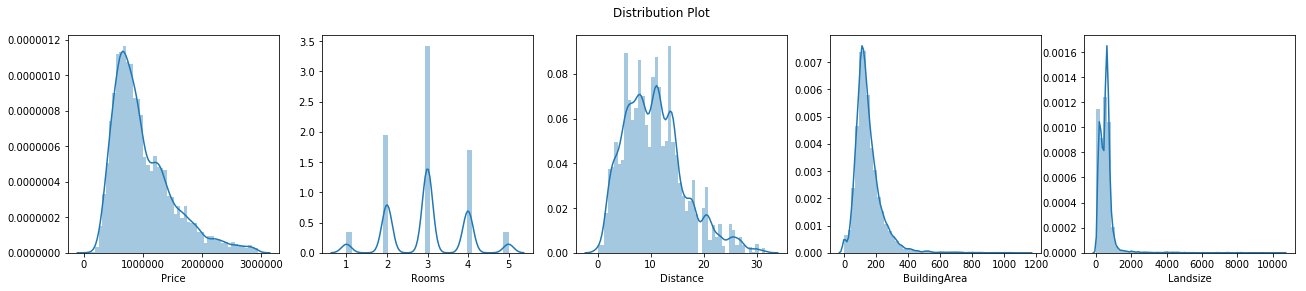

In [20]:
fig, axes = plt.subplots(1, 5, figsize=(22, 4))
fig.suptitle('Distribution Plot')

sns.distplot(melb_df_full[melb_df_full.Price < min(price_outliers)].Price, ax=axes[0])
sns.distplot(melb_df_full[melb_df_full.Rooms < min(room_outliers)].Rooms, ax=axes[1])
sns.distplot(melb_df_full[melb_df_full.Distance < min(distance_outliers)].Distance, ax=axes[2])
sns.distplot(melb_df_full[melb_df_full.BuildingArea < min(build_area_outliers)].BuildingArea, ax=axes[3])
sns.distplot(melb_df_full[melb_df_full.Landsize < min(landsize_outliers)].Landsize, ax=axes[4])

Everything except the Rooms somehow follow a Weibull Distribution

https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm

But according to the Central Limit Theorem, I can still apply Z-score even if it's not a Normal Distribution

# Update the Dataframe by removing all the outliers from the observations

In [21]:
min(price_outliers)

2975000.0

In [22]:
melb_df_full = melb_df_full[(melb_df_full.Price < min(price_outliers)) & 
                           (melb_df_full.Rooms < min(room_outliers)) & 
                           (melb_df_full.Distance < min(distance_outliers)) & 
                           ((melb_df_full.BuildingArea < min(build_area_outliers)) | (melb_df_full.BuildingArea.isnull())) & 
                           ((melb_df_full.Landsize < min(landsize_outliers)) | (melb_df_full.Landsize.isnull()))]

In [23]:
melb_df_full.shape

(25963, 21)

In [24]:
melb_df_full[melb_df_full.CouncilArea.isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looks like we still had two observations with lots of null values, let's just not include them

In [25]:
melb_df_full = melb_df_full[melb_df_full.CouncilArea.notnull()]

# TODO 3: Set aside features with object data type first and apply some kind of imputation procedure to the missing values

Source: https://www.kaggle.com/dansbecker/handling-missing-values

In [26]:
melb_cat_features = melb_df_full.columns[melb_df_full.dtypes == 'object']
melb_cat_features

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [27]:
melb_df_cat = melb_df_full.loc[:, melb_cat_features]
melb_df_cat.head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
5,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
6,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra City Council,Northern Metropolitan


For now drop the columns with object dtypes 

In [28]:
'''
melb_df_con: the 'con' stands for continuous and we will apply the imputation procedure on this df 
and combine it with the categorical df (melb_df_cat) later on
'''

melb_df_con = melb_df_full.drop(melb_cat_features, axis = 1)
melb_df_con.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
5,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


The remaining categorical values are Postcode, YearBuilt, Lattitude, Longitude and Propertycount. Let's check the null values in each of these features

In [29]:
melb_df_con.loc[:, ['Postcode', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']].isnull().sum()

Postcode             0
YearBuilt        14534
Lattitude         6065
Longtitude        6065
Propertycount        0
dtype: int64

Lattitude and Longitude are both redundant values in our price predictor model since we have Suburb information anyway so let's just drop those two columns

In [30]:
melb_df_full.drop(['Lattitude', 'Longtitude'], axis = 1, inplace = True)
melb_df_con.drop(['Lattitude', 'Longtitude'], axis = 1, inplace = True)

In [107]:
melb_df_con.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount'],
      dtype='object')

In [108]:
melb_df_cat.columns

Index(['Date', 'Suburb14', 'Suburb13', 'Suburb12', 'Suburb11', 'Suburb10',
       'Suburb9', 'Suburb8', 'Suburb7', 'Suburb6', 'Suburb5', 'Suburb4',
       'Suburb3', 'Suburb2', 'Suburb1', 'Sellers15', 'Sellers14', 'Sellers13',
       'Sellers12', 'Sellers11', 'Sellers10', 'Sellers9', 'Sellers8',
       'Sellers7', 'Sellers6', 'Sellers5', 'Sellers4', 'Sellers3', 'Sellers2',
       'Sellers1', 'Type3', 'Type2', 'Type1', 'Method2', 'Method1',
       'CouncilArea5', 'CouncilArea4', 'CouncilArea3', 'CouncilArea2',
       'CouncilArea1', 'Regionname3', 'Regionname2', 'Regionname1'],
      dtype='object')

NOTE: There are also categorical features that are float data types such as post code, year built and property count. We'll include these in the melb_df_con for now so we can apply the imputation method on them

# TODO 4: Prove that imputing the missing values will improve the performance of the model

Now we are ready to apply imputation on the missing values in the melb_df_con features but first let's see if applying imputation actually improved performance. 

Let us define a helper function that would compute the model score

In [31]:
# Calculate the model score
def compute_mae(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

What's the score if we just simply drop columns with null values

In [32]:
# Create a List with all features within melb_df_con that has null values
features_with_null = [feature for feature in melb_df_con.columns if melb_df_con[feature].isnull().any()]
features_with_null

['Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']

The list above shows features with null values so create a test dataframe with those features and compute the score

In [33]:
# Create a new data frame where columns with null values have been dropped
test_df_drop_null = melb_df_con.drop(features_with_null, axis = 1)
y = test_df_drop_null.Price
X_drop = test_df_drop_null.drop(['Price'], axis = 1)

In [34]:
# Split the data
X_drop_train, X_drop_test, y_train, y_test = train_test_split(X_drop, y, random_state = 42, test_size = 0.3)

# Score the data
print(compute_mae(X_drop_train, X_drop_test, y_train, y_test))

C:\Users\john.osorio\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


204207.87068991282


What's the new score if we apply imputation to the dataset

In [35]:
X = melb_df_con.drop(['Price'], axis = 1)

Before we apply the imputer, let's convert null values in Bedroom2 and Bathroom to ZERO

In [36]:
X.isnull().sum()

Rooms                0
Distance             0
Postcode             0
Bedroom2          6242
Bathroom          6247
Car               6609
Landsize          8867
BuildingArea     15927
YearBuilt        14534
Propertycount        0
dtype: int64

In [37]:
X.Bedroom2.fillna(0, inplace = True)
X.Bathroom.fillna(0, inplace = True)

In [38]:
X.isnull().sum()

Rooms                0
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car               6609
Landsize          8867
BuildingArea     15927
YearBuilt        14534
Propertycount        0
dtype: int64

In [39]:
simple_imputer = SimpleImputer()
imputed_X = simple_imputer.fit_transform(X)

In [40]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(imputed_X, y, random_state = 42, test_size = 0.3)

# Score the data
print(compute_mae(X_train, X_test, y_train, y_test))

C:\Users\john.osorio\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


174240.5726309614


In [41]:
melb_df_cat.columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

Imputing the missing values significantly improves the model's performance

# TODO 5: Finalize the melb_df_con dataframe by imputing the missing values


In [42]:
melb_df_con.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,4019.0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0
5,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,4019.0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0


In [43]:
melb_df_con_imp = simple_imputer.fit_transform(melb_df_con)
melb_df_con_imp.shape

(25961, 11)

In [44]:
melb_df_con_imp[0]

array([2.00000000e+00, 1.48000000e+06, 2.50000000e+00, 3.06700000e+03,
       2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.02000000e+02,
       1.45899025e+02, 1.96647493e+03, 4.01900000e+03])

In [45]:
melb_df_con_columns = melb_df_con.columns

In [46]:
melb_df_con = pd.DataFrame(melb_df_con_imp, columns = melb_df_con_columns)

In [47]:
melb_df_con.isnull().sum()

Rooms            0
Price            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Propertycount    0
dtype: int64

No more null values, awesome! Let's set aside the melb_df_con dataframe for now. 

# TODO: Create a dictionary of all the continuous values for new data

This will be used for when we fit the new data into the model. We will replace any missing values with the ones in the dictionary

In [48]:
info = melb_df_con.describe()

In [49]:
temp = info.loc['mean', :]

In [50]:
missing_con_dict = temp.to_dict()
missing_con_dict

{'Rooms': 2.939100959131004,
 'Price': 1005786.2122029198,
 'Distance': 10.750914833789235,
 'Postcode': 3105.267824814144,
 'Bedroom2': 2.9916831482324664,
 'Bathroom': 1.553160190727486,
 'Car': 1.6836502687062918,
 'Landsize': 492.931437931485,
 'BuildingArea': 145.8990247957188,
 'YearBuilt': 1966.474927803102,
 'Propertycount': 7510.44212472555}

# TODO 6: Apply a feature hashing scheme to the categorical values to decrease the levels significantly e.g. Suburb

Source: https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

In [51]:
# Let's see what we got
melb_df_cat.head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
5,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
6,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra City Council,Northern Metropolitan


I think it seems prudent to just drop the Address column since in theory, all addresses must be unique for all properties which makes it similar to the index anyway

In [52]:
melb_df_cat.drop(['Address'], axis = 1, inplace = True)

Now let's see how many unique categories we have per feature

In [53]:
for n in melb_df_cat.columns:
    
    print('We have', melb_df_cat[n].unique().shape[0], 'unique', n, 'types')

We have 301 unique Suburb types
We have 3 unique Type types
We have 5 unique Method types
We have 321 unique SellerG types
We have 78 unique Date types
We have 28 unique CouncilArea types
We have 8 unique Regionname types


In [ ]:
We have 301 unique Suburb types
We have 3 unique Type types
We have 5 unique Method types
We have 321 unique SellerG types
We have 78 unique Date types
We have 28 unique CouncilArea types
We have 8 unique Regionname types

# Group together all the single Sellers into a new category 'other', check why they only have one property listed e.g. high price etc...

In [54]:
test = sorted(melb_df_cat.SellerG.unique())
test_np = np.array(test)

Create a new dataframe with Sellers that only has 5 or less properties listed

In [55]:
test1 = (melb_df_cat.SellerG.value_counts() <= 5).sort_index()
test1_np = np.array(test1)

In [56]:
low_property_count = test_np[test1_np]

In [57]:
low_property_count_df = melb_df_full[melb_df_full.SellerG.isin(low_property_count)]

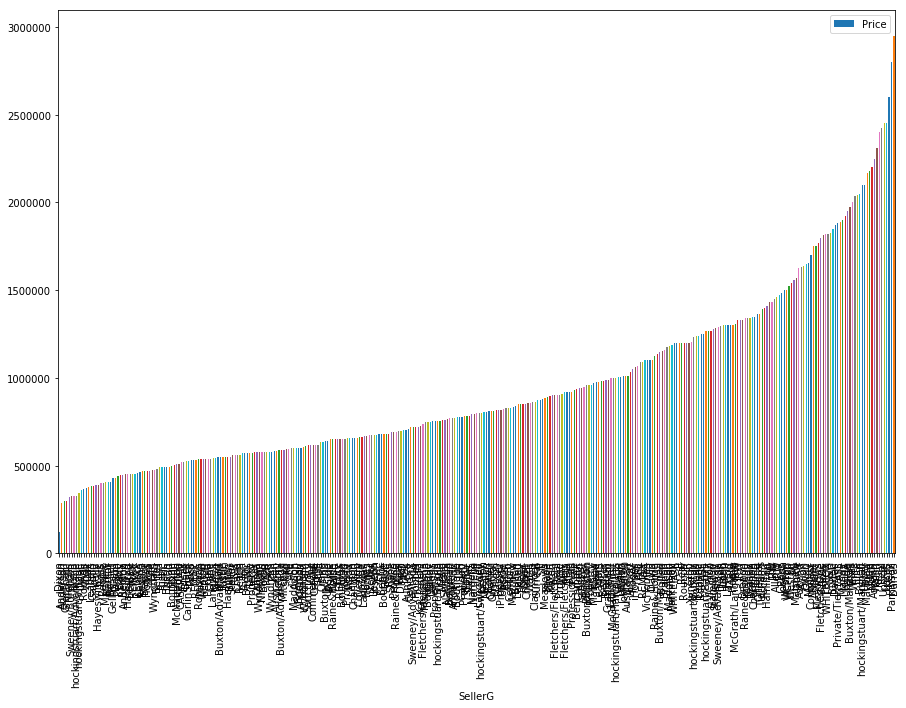

In [58]:
low_property_count_df.sort_values('Price').plot(x = 'SellerG', y = 'Price', kind='bar', figsize=(15, 10))

In [59]:
property_prices = low_property_count_df.Price
print('The price range for the single property sellers are between', min(property_prices), 'and', max(property_prices))


The price range for the single property sellers are between 121000.0 and 2950000.0


# Let's change all the single property sellers into 'Others'

In [60]:
sellerg_series = melb_df_full.loc[:, 'SellerG'].replace(to_replace=low_property_count, value='Others')

In [61]:
melb_df_cat['Sellers'] = sellerg_series

In [62]:
melb_df_cat.drop('SellerG', axis=1, inplace=True)

In [63]:
melb_df_cat.head()

,Suburb,Type,Method,Date,CouncilArea,Regionname,Sellers
1,Abbotsford,h,S,3/12/2016,Yarra City Council,Northern Metropolitan,Biggin
2,Abbotsford,h,S,4/02/2016,Yarra City Council,Northern Metropolitan,Biggin
4,Abbotsford,h,SP,4/03/2017,Yarra City Council,Northern Metropolitan,Biggin
5,Abbotsford,h,PI,4/03/2017,Yarra City Council,Northern Metropolitan,Biggin
6,Abbotsford,h,VB,4/06/2016,Yarra City Council,Northern Metropolitan,Nelson


# Perhaps also change Subrubs with 5 or less listed properties into Others as well

In [64]:
temp = sorted(melb_df_cat.Suburb.unique())
temp_np = np.array(temp)

Create a new dataframe with Suburbs that has only 5 or less properties listed

In [65]:
temp1 = (melb_df_cat.Suburb.value_counts() <= 5).sort_index()
temp1_np = np.array(temp1)

In [66]:
low_suburb_count = temp_np[temp1_np]

In [67]:
suburb_series = melb_df_full.loc[:, 'Suburb'].replace(to_replace=low_suburb_count, value='Others')

In [68]:
melb_df_cat.drop('Suburb', axis=1, inplace=True)

In [69]:
melb_df_cat['Suburb'] = suburb_series

In [70]:
melb_df_cat.Suburb.value_counts().count()

275

# Another method to deal with Categorical Variables

https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159

https://booking.ai/dont-be-tricked-by-the-hashing-trick-192a6aae3087

https://en.wikipedia.org/wiki/Hash_table#Collision_resolution

# Figure out a way to most effectively apply a feature hasher without collisions

Firstly, create a function that iterates through the number of buckets to find out the optimal number of features

In [71]:
def feature_hasher_n(key, df):
    
    '''
    This determines the optimal number of n_features or buckets for the hash table right 
    before a hashing collision.
    
    Parameters
    
    key: the categorical variable feature as a String
    df: the main dataframe
    
    Returns
    The hashed feature dataframe and the dictionary of key : hash value pairs for reverse lookup
    
    '''
    size = len(df[key].unique())
    x = 1
    
    while(True):
#         print(x)
        
        # Initialize our Feature Hasher 
        temp = FeatureHasher(n_features = x, input_type='string')
        
        # Transform the dataframe keys into their corresponding matrix code
        features = temp.fit_transform(df[key])
        hashed_features = features.toarray()
        
        # Generate columns for the hash values, this one is just the key name plus numerical increments
        columns = [key + str(y) for y in range(x, 0, -1)]
        
        # Create a dataframe for the hashed values
        hashed_df = pd.DataFrame(hashed_features, columns=columns)
        hashed_df[key] = df.reset_index(drop=True)[key]

        # get the size by only getting the unique suburbs and after that getting the unique hash values
        test_size = hashed_df.drop_duplicates(subset=key).drop_duplicates(subset=columns).shape[0]
        
        unique_df = hashed_df.drop_duplicates(subset=key).drop_duplicates(subset=columns)
        
        
#         print('test size is: ', test_size, 'while size is: ', size)
        
        # Compare the number of unique hash values in the table to that of the original dataframe unique suburb count
        # if it is less then there have been collisions or duplicate values. If it is equal then every hash value is unique
        if (test_size == size):
            
            print('n_features is: ', x)
            
            # Create a dictionary or lookup table so we can resolve the hash matrix to their corresponding key value 
            # in the future--> for new data        
            hashed_list = hash_to_dict(unique_df.reset_index(drop=True), key)
            
            # Return the hashed dataframe and list since we now know that they don't have any duplicates
            return hashed_df, hashed_list
            break
            
        x += 1
        


# Now figure out a way to have a reverse lookup on a hash table and convert it to suburb

In [72]:
def hash_to_dict(unique_df, key):
    
    '''
    This will convert the unique dataframe into a dictionary of key : hash value pairs in a list
    
    Parameters
    unique_df: this is a dataframe containing UNIQUE ROWS
    key: the categorical feature column
    
    Returns
    A dictionary of key : hash values in a list
    '''
    
    key_values = unique_df[key]
    hash_values = unique_df.drop(key, axis=1)
    df_size = unique_df.shape[0]
    hash_list = []
    
    for row in range(df_size):
        
        hash_dict = {key_values[row] : np.array(hash_values.loc[row, :])}
        hash_list.append(hash_dict)
    
    return hash_list

In [73]:
for n in melb_df_cat.columns:
    
    print('We have', melb_df_cat[n].unique().shape[0], 'unique', n, 'types')

We have 3 unique Type types
We have 5 unique Method types
We have 78 unique Date types
We have 28 unique CouncilArea types
We have 8 unique Regionname types
We have 152 unique Sellers types
We have 275 unique Suburb types


# Transform the Categorical features into their corresponding hash values and store them in dictionaries for new data transformation

In [74]:
suburb_hashed, suburb_hashed_dict = feature_hasher_n('Suburb', melb_df_cat)

n_features is:  14


In [75]:
seller_hashed, seller_hashed_dict = feature_hasher_n('Sellers', melb_df_cat)

n_features is:  15


In [76]:
type_hashed, type_hashed_dict = feature_hasher_n('Type', melb_df_cat)

n_features is:  3


In [77]:
method_hashed, method_hashed_dict = feature_hasher_n('Method', melb_df_cat)

n_features is:  2


In [78]:
councilarea_hashed, councilarea_hashed_dict = feature_hasher_n('CouncilArea', melb_df_cat)

n_features is:  5


In [79]:
regionname_hashed, regionname_hashed_dict = feature_hasher_n('Regionname', melb_df_cat)

n_features is:  3


In [80]:
suburb_hashed_dict[1]

{'Airport West': array([ 1., -1.,  0.,  0.,  0., -2.,  0.,  0.,  0.,  3.,  0.,  0., -1.,
         0.])}

In [110]:
suburb_hashed.head()

,Suburb14,Suburb13,Suburb12,Suburb11,Suburb10,Suburb9,Suburb8,Suburb7,Suburb6,Suburb5,Suburb4,Suburb3,Suburb2,Suburb1,Suburb
0,0.0,-1.0,0.0,-2.0,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,Abbotsford
1,0.0,-1.0,0.0,-2.0,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,Abbotsford
2,0.0,-1.0,0.0,-2.0,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,Abbotsford
3,0.0,-1.0,0.0,-2.0,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,Abbotsford
4,0.0,-1.0,0.0,-2.0,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,Abbotsford


# Reset the indexing of melb_df_cat so that concatenation will align, otherwise some values will append and create new rows

In [81]:
melb_df_cat.reset_index(drop=True, inplace=True)

In [82]:
melb_df_cat.drop('Suburb', axis=1, inplace=True)
melb_df_cat = pd.concat([melb_df_cat, suburb_hashed], axis=1)
melb_df_cat.drop('Suburb', axis=1, inplace=True)

In [83]:
melb_df_cat.drop('Sellers', axis=1, inplace=True)
melb_df_cat = pd.concat([melb_df_cat, seller_hashed], axis=1)
melb_df_cat.drop('Sellers', axis=1, inplace=True)

In [84]:
melb_df_cat.drop('Type', axis=1, inplace=True)
melb_df_cat = pd.concat([melb_df_cat, type_hashed], axis=1)
melb_df_cat.drop('Type', axis=1, inplace=True)

In [85]:
melb_df_cat.drop('Method', axis=1, inplace=True)
melb_df_cat = pd.concat([melb_df_cat, method_hashed], axis=1)
melb_df_cat.drop('Method', axis=1, inplace=True)

In [86]:
melb_df_cat.drop('CouncilArea', axis=1, inplace=True)
melb_df_cat = pd.concat([melb_df_cat, councilarea_hashed], axis=1)
melb_df_cat.drop('CouncilArea', axis=1, inplace=True)

In [87]:
melb_df_cat.drop('Regionname', axis=1, inplace=True)
melb_df_cat = pd.concat([melb_df_cat, regionname_hashed], axis=1)
melb_df_cat.drop('Regionname', axis=1, inplace=True)

In [88]:
melb_df_cat.head()

,Date,Suburb14,Suburb13,Suburb12,Suburb11,Suburb10,Suburb9,Suburb8,Suburb7,Suburb6,...,Method2,Method1,CouncilArea5,CouncilArea4,CouncilArea3,CouncilArea2,CouncilArea1,Regionname3,Regionname2,Regionname1
0,3/12/2016,0.0,-1.0,0.0,-2.0,0.0,-1.0,0.0,0.0,0.0,...,-1.0,0.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0
1,4/02/2016,0.0,-1.0,0.0,-2.0,0.0,-1.0,0.0,0.0,0.0,...,-1.0,0.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0
2,4/03/2017,0.0,-1.0,0.0,-2.0,0.0,-1.0,0.0,0.0,0.0,...,-1.0,-1.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0
3,4/03/2017,0.0,-1.0,0.0,-2.0,0.0,-1.0,0.0,0.0,0.0,...,1.0,-1.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0
4,4/06/2016,0.0,-1.0,0.0,-2.0,0.0,-1.0,0.0,0.0,0.0,...,-1.0,1.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0


# TODO: Combine the categorical dataframe with the continuous dataframe

In [89]:
melb_df_final = pd.concat([melb_df_con, melb_df_cat], axis=1)

In [90]:
melb_df_final.shape

(25961, 54)

In [91]:
melb_df_final.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Method2,Method1,CouncilArea5,CouncilArea4,CouncilArea3,CouncilArea2,CouncilArea1,Regionname3,Regionname2,Regionname1
0,2.0,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,145.899025,1966.474928,...,-1.0,0.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0
1,2.0,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.000000,...,-1.0,0.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0
2,3.0,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.000000,...,-1.0,-1.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0
3,3.0,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,145.899025,1966.474928,...,1.0,-1.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0
4,4.0,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.000000,...,-1.0,1.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0


In [92]:
def convert_to_unixtime(date_str):
    format_str = '%d/%m/%Y' # The format
    datetime_obj = datetime.strptime(date_str, format_str)
    unixtime = time.mktime(datetime_obj.timetuple())
    
    return unixtime

In [93]:
melb_df_final['DateTime'] = melb_df_final.loc[:, 'Date'].apply(convert_to_unixtime)

In [94]:
melb_df_final.drop('Date', axis=1, inplace=True)

In [95]:
melb_df_final.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Method1,CouncilArea5,CouncilArea4,CouncilArea3,CouncilArea2,CouncilArea1,Regionname3,Regionname2,Regionname1,DateTime
0,2.0,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,145.899025,1966.474928,...,0.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0,1.480684e+09
1,2.0,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.000000,...,0.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0,1.454504e+09
2,3.0,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.000000,...,-1.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0,1.488546e+09
3,3.0,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,145.899025,1966.474928,...,-1.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0,1.488546e+09
4,4.0,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.000000,...,1.0,4.0,-4.0,2.0,1.0,-1.0,-7.0,9.0,1.0,1.464962e+09


# TODO: Store the final dataframe into another CSV file for Machine Learning in a different notebook

In [96]:
# melb_df_final.to_csv(r'C:\Users\john.osorio\Desktop\BLACK CAT\Capstone Project\House Price Predictor\melbourne-housing-market\melbourne_housing_transformed.csv')